## Portfolio 1 - Cycling Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
    from matplotlib import pyplot as plt
from datetime import timedelta
from pandas.plotting import scatter_matrix
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('Australia/Sydney')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-03 07:47:51+11:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 12:36:53+11:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 13:56:00+11:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 16:37:04+11:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-06 06:22:46+11:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
table_merge=pd.merge(cheetah, strava, left_index=True, right_index=True, how='inner')
table_merge.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride


### REQUIRED ANALYSIS
1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

In [5]:
not_MTB=table_merge[table_merge.device_watts!=False] #remove device_watts = False

not_MTB['Time Moving']=not_MTB['Time Moving']/60 #convert Time Moving to minutes
not_MTB['Duration']=not_MTB['Duration']/60 #convert Time Moving to minutes

#create new DataFrame for data analysis
new_MTB=not_MTB[['Average Heart Rate', 'Average Speed', 'Average Power', 'distance', 'Elevation Gain', 'Time Moving', 'TSS', 'Duration', 'workout_type']]
new_MTB=new_MTB.sort_values(['distance', 'TSS'])
new_MTB.columns = ['Average Heart Rate', 'Average Speed', 'Average Power', 'Distance', 'Elevation Gain', 'Time Moving', 'TSS', 'Duration', 'Workout Type']

C:\Users\Alyssa Raphaella Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alyssa Raphaella Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


2. Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
    * __Average Power__ and __Average Speed__ have left skewed graphs.
    * __Distance__, __Duration__, and __TSS__ have right skewed graphs.

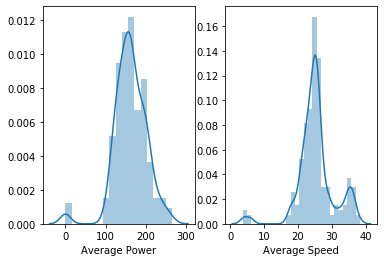

In [6]:
fig, axes = plt.subplots(1, 2) #two plots side by side

# Distribution Plot (a.k.a. Histogram)
sns.distplot(new_MTB['Average Power'],
             ax=axes[0])
sns.distplot(new_MTB['Average Speed'],
             ax=axes[1])

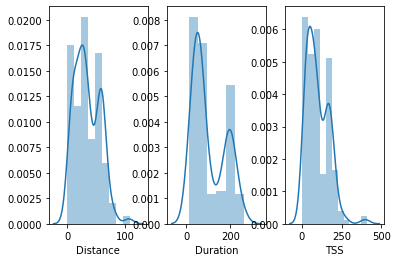

In [7]:
fig, axes = plt.subplots(1, 3) #two plots side by side

# Distribution Plot (a.k.a. Histogram)
sns.distplot(new_MTB['Distance'],
             ax=axes[0])
sns.distplot(new_MTB['Duration'],
             ax=axes[1])
sns.distplot(new_MTB['TSS'],
             ax=axes[2])

3. Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe? 
    * __Average Heart Rate__, __Average Power__ and __Average Speed__ are correlated with each other 
    * __Distance__, __Elevation Gain__, __Time Moving__ and __TSS__ are correlated with each other

In [8]:
%run scripts/PearsonValue.py

<Figure size 432x288 with 0 Axes>

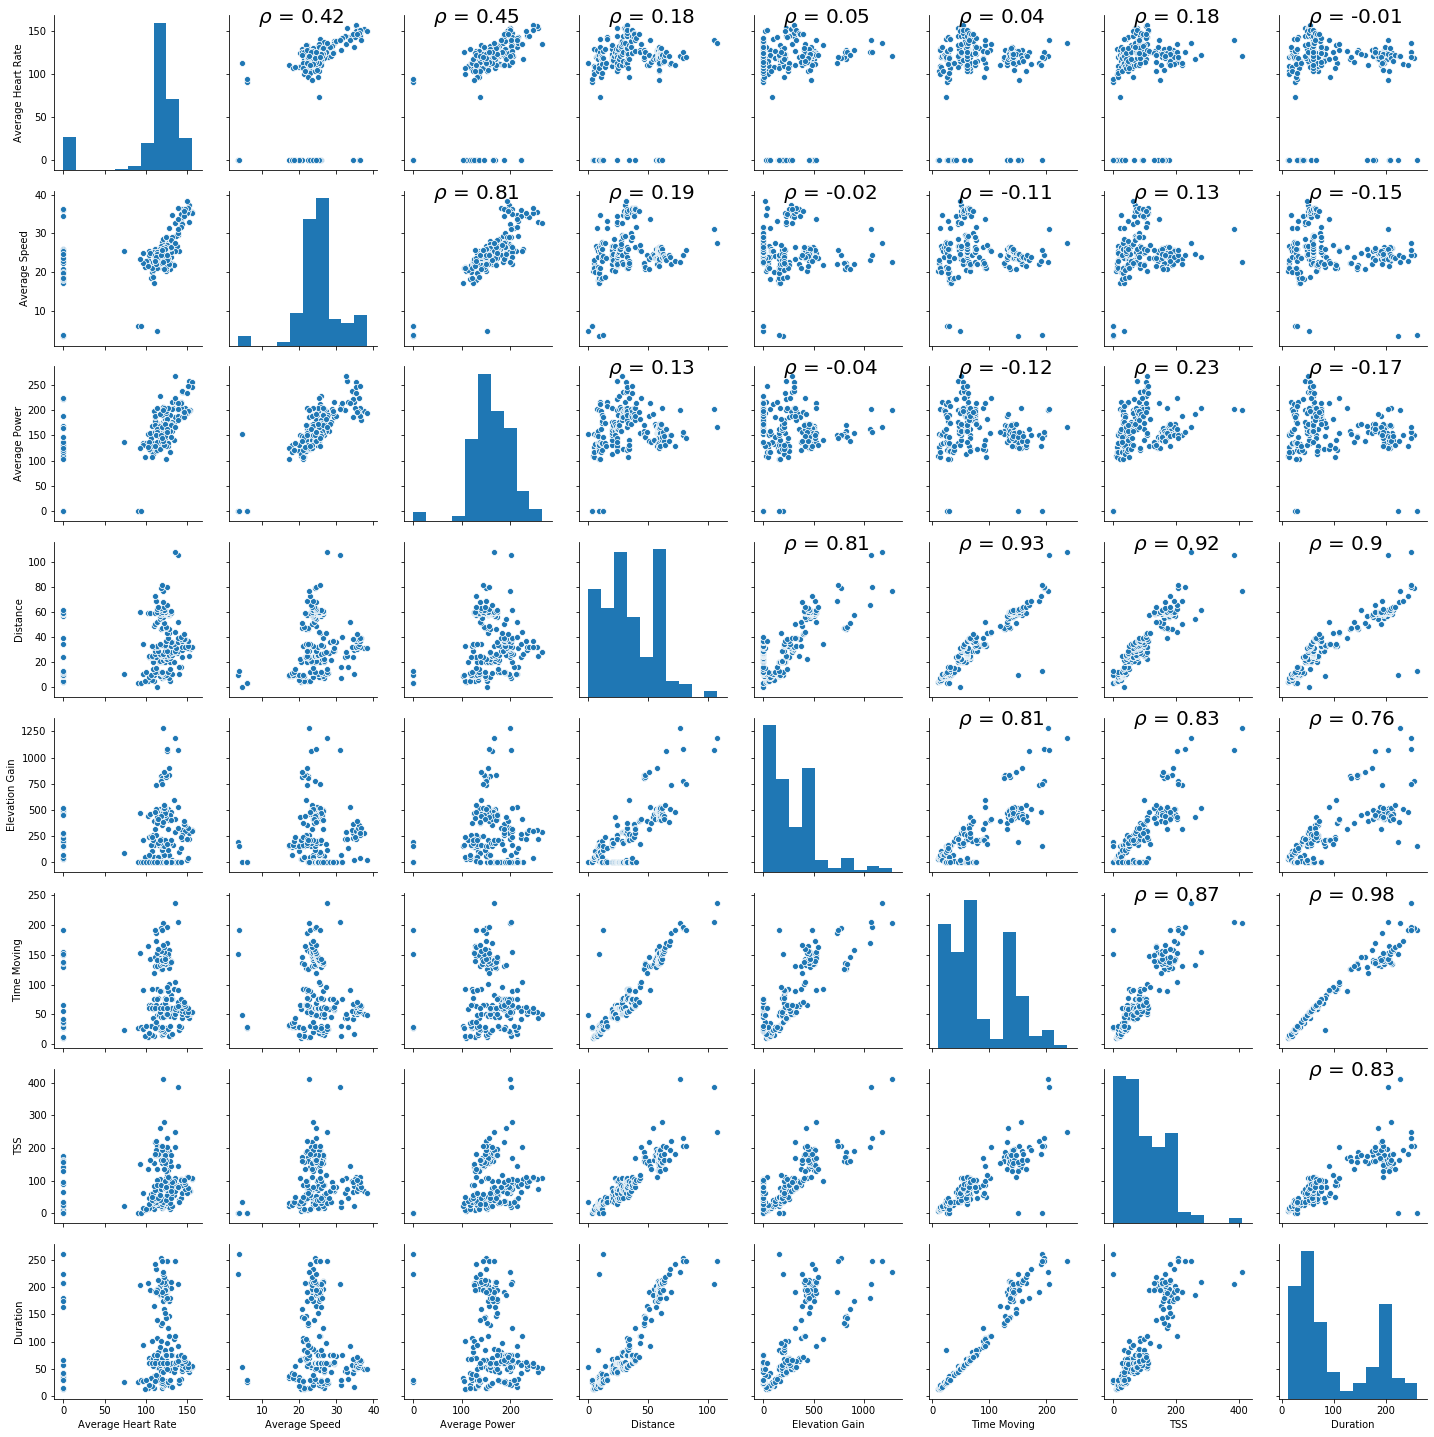

In [9]:
g = sns.pairplot(new_MTB,
             palette = 'husl')

g.map_upper(corr)
plt.show()

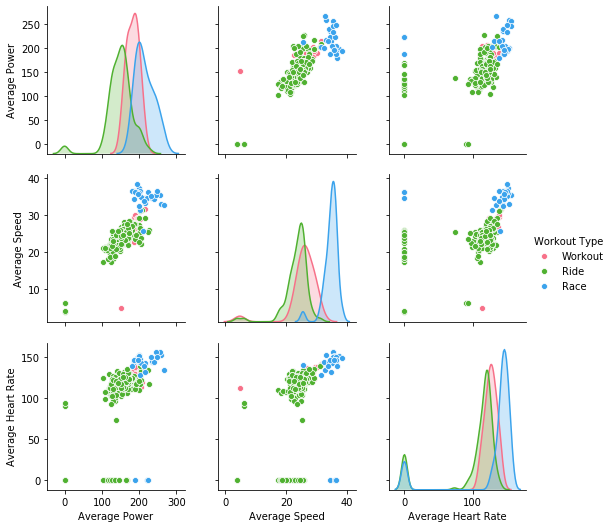

In [10]:
sns.pairplot(new_MTB,
             vars = ['Average Power', 'Average Speed', 'Average Heart Rate'],
             hue = 'Workout Type',
             palette = 'husl')

##### Average Heart Rate vs Average Power
* The higher the Average Heart Rate, the more power the cyclist exerted.
* The cyclist __exerts more power__ in a __Race__ compared to a normal Ride and Workout, which results to __higher Average Heart Rate__ as well.
* Data that has __Average Heart Rate or Average power equal to Zero(0)__ may be cased by device/external __errors__.

##### Average Speed vs Average Power
* The higher the power, the faster the bike will be. This is supported by Power's formula :<br> 
__$Power = Force * Velocity$__
* As per last analysis in the previous plot(
_Average Heart Rate VS Average Power_ ), the cylist exerts __more power in Races__ compared to having a normal Ride and Workout. This also results to having __faster speed in Races__ compared to having a normal Ride and Workout.
* Data that has __Average Speed__ or __Average Power__ equal to __Zero(0)__ may be cased by device/external __errors__.

##### Average Heart Rate vs Average Speed
* The __faster the Speed__ of the bike the __higher the Average Heart Rate__ will be.
* As per the previous plots, the __more power the cyclist exterts the faster the bike will be__, and the higher the heart rate he will have.
* The cyclist, same with the previous plot, has higher __Average Heart Rate__ compared in a __Race__ compared to having a normal Ride and Workout
* Data that has __Average Heart Rate__ or __Average Speed__ equal to __Zero(0)__ may be cased by device/external __errors__.

##### Observation per Workout Type
* as seen in histogram plot, the __values of Workout is almost aligned with Ride and Race values__.

C:\Users\Alyssa Raphaella Lim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alyssa Raphaella Lim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


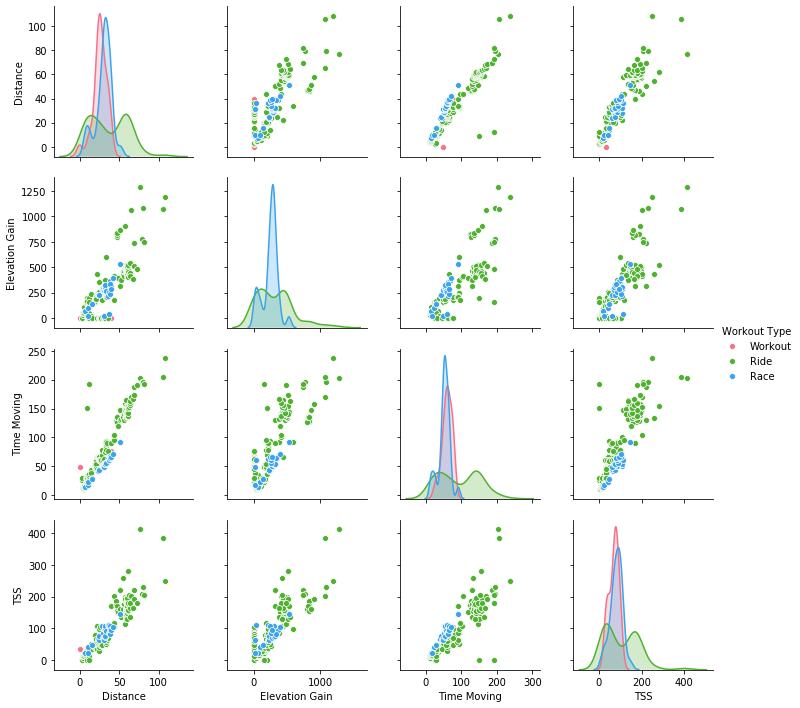

In [11]:
sns.pairplot(new_MTB,
             vars = ['Distance', 'Elevation Gain', 'Time Moving', 'TSS'],
             hue = 'Workout Type',
             palette = 'husl')

##### Distance vs Time Moving
* The __longer the distance__ the __higher the time moving__ is, which may be supported by the formula:<br>
__$Distance = Speed * Time$__ <br>
* We can say that distance and moving time are __dependent to each other__.
* __Ride__ has __longer distance range__ compared to the other 2 categories, that's why its __moving time is also higher__.
* As seen in the graph, the __Race__ plots has __lower value of Time Moving__ compared to the other two categories. This is because __speed and time are indirectly proportional__ with each other.

##### Distance vs TSS
* The __longer the distance__ the __higher the TSS__.<br>
__$TSS = (Intensity Factor)^2 * Ride Time (hours) * 100$__ <br>
* Moving Time which we can say dependent to distance, affects TSS.

##### Elevation Gain vs Distance
* For the __Ride__ and __Race__ categories, the __longer the Distance__ travelled by the cyclist the __higher his elevation gain__ is. 
* There are some plots with a __higher Elevation Gain__ even though the __horizontal distance is the same__, these plots have __higher vertical distance__.
* The horizaontal distance affects the Elevation Gain rate of the cyclist:<br>
__$Elavation Gain = \frac{Veritical Distance}{Horizontal Distance} * 100$__ <br>
* The __Workout plot__ has __Zero(0) elevation gain__ because the cyclist is cycling in __stationary position__.

##### Elevation Gain vs Time Moving
* For __Race__ and __Ride__ categories, the __higher the Elevation Gain__ rate is, the __higher the time moving__.
* This is because Vertical Distance and Gravity, slower the acceleration of the cyclist that leads to __higher time moving__.<br>
__$Time = \frac{Distance}{Average Speed}$__
* The __Workout plot__ has __Zero(0) elevation gain__ because the cyclist is cycling in __stationary position__.

##### Elevation Gain vs TSS
* For __Race__ and __Ride__ categories, the __higher the Elevation Gain__ rate is, the __higher the TSS__.
* The __Workout plot__ has __Zero(0) elevation gain__ because the cyclist is cycling in __stationary position__.

##### TSS vs Time Moving
* The longer the __higher the TSS__, the __longer the Time Moving__ period is.<br>
__$TSS = (Intensity Factor)^2 * Ride Time (hours) * 100$__
* Since the Race category has the shortest Time Moving period, it's TSS is also lower compared to the other two catgories.
* Time Moving is affected by the Speed.<br>
__$Time = \frac{Distance}{Average Speed}$__

4. We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).

In [12]:
# Melt DataFrame
melt_MTB = pd.melt(new_MTB, 
                    id_vars=['Workout Type'],
                    var_name="Vars")

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

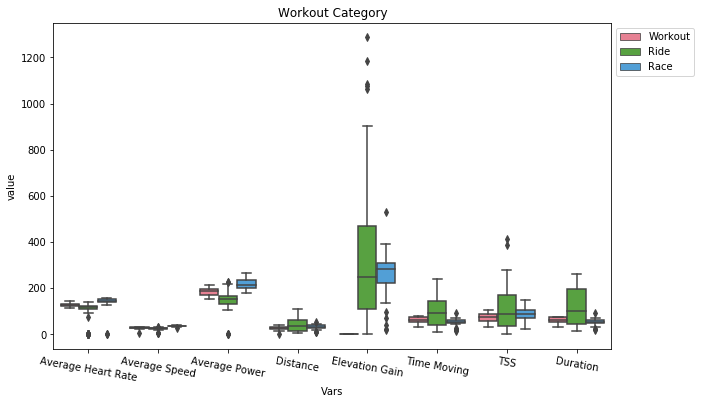

In [13]:
plt.figure(figsize=(10,6)) #plot size

#box plot
sns.boxplot(x = 'Vars',
            y = 'value',
            data = melt_MTB,
            hue = 'Workout Type',
            palette = 'husl') 

plt.title('Workout Category')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-10)

C:\Users\Alyssa Raphaella Lim\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

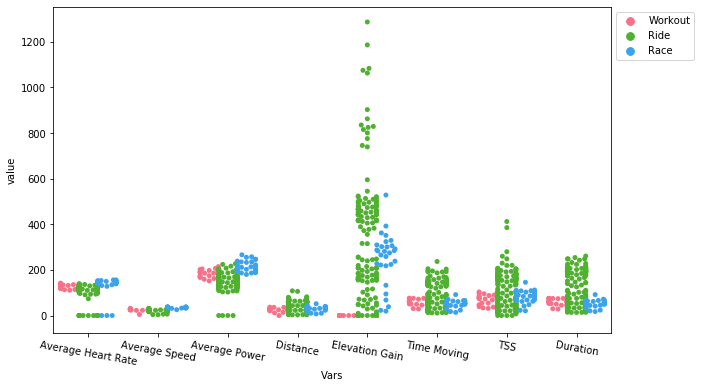

In [14]:
plt.figure(figsize=(10,6)) 
 
sns.swarmplot(x = 'Vars', 
              y = 'value', 
              data = melt_MTB, 
              hue = 'Workout Type', 
              split = True,
              palette = 'husl')
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-10)

* __Duration and Time Moving have equal values__ , for categories __Race__ and __Workout__. 
* While __Ride__ has __longer Duration__ compared to __Time Moving__, which means that in a normal ride, the __cyclist takes breaks__ unlike in the two other categories that ride is continuous(no stops).
* Looking at the three graphs we can observe the relationship of __Average Speed, Duration, and Time Moving__. The __lower the Average Speed__ is the __higher the Duration and Time Moving__ of the cyclist.
* Though __Ride's Elevation Gain is significantly higher__ than the others, its __Average Heart Rate value is smaller__ compared to __Race and Workout__ . This is due to the __Average Speed and Average Power__ of __Race__ and __Workout__ are __higher__. 
* Though __Ride's Time Moving is significantly higher__ than the other two categories, its __distance only has small difference__ from the other two. This is because its __Average Speed is lower__ compared to the other two categories.

## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

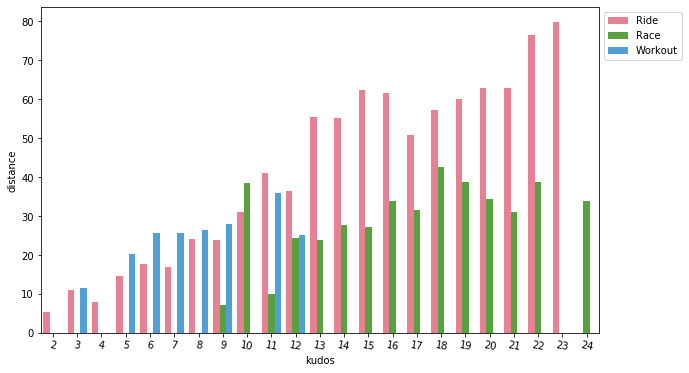

In [15]:
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'kudos', 
            y = 'distance', 
            data = not_MTB, 
            hue = 'workout_type', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-10)

* __Longer rides__ receives __more Kudos__ . 
* __Race__ category receives __more Kudos__ compared to the other two, even though its __Avearage Distance is shorter__ . 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

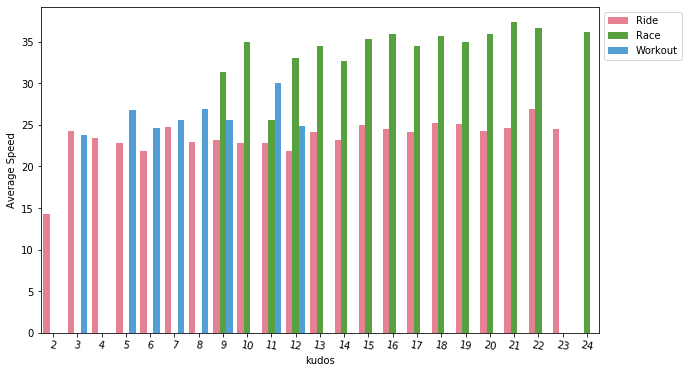

In [16]:
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'kudos', 
            y = 'Average Speed', 
            data = not_MTB, 
            hue = 'workout_type', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-10)

* Race category has higher distance compared to others, but it seems like __Average Speed doesn't affect the number of Kudos__ .
* The __Average Speed__ from different categories are __consistent__ , yet their __number of Kudos__ are varying. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

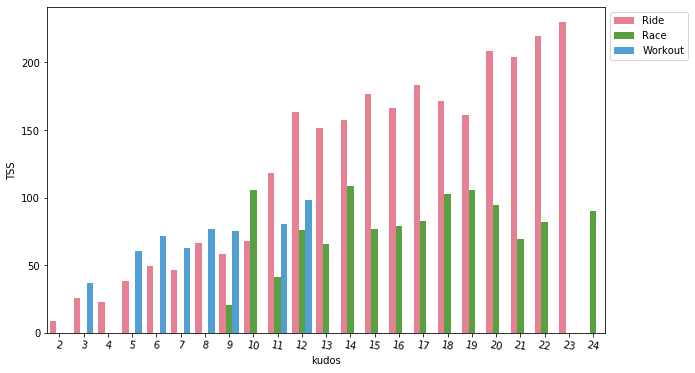

In [17]:
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'kudos', 
            y = 'TSS', 
            data = not_MTB, 
            hue = 'workout_type', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-10)

* The Average TSS varies per number of Kudos
* __Higher TSS__ per catergory __doesn't guarantee more number of kudos__ .
* There are __TSS__ which have __high values__ but __lesser number of kudos__ , and others which has __lower TSS__ but __higher number of kudos__ . 

##### Observations:
* __Category of ride matters to get more Kudos__ . Races receives the most Kudos, compared to Rides and Workouts.
* The __longer__ the __distance__ the __more Kudos__ is received by the rider.
* As seen in the second and third graphs, __Average Speed__ doesn't really count in receiving more Kudos, same with __Average TSS__ .

## Challenge
* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

In [18]:
%run scripts/CBtwo

#Display DataFrame
df_DT=pd.DataFrame.from_records(Summary, MY)
df_DT=df_DT.dropna()
df_DT.columns=['Total Distance', 'Total TSS', 'Average Speed']
df_DT

,Total Distance,Total TSS,Average Speed
Jan2018,46.2,114.8044,30.230700
Jan2019,423.2,1057.9363,15.231867
Feb2018,476.8,1087.2924,23.471867
Feb2019,494.9,1269.9272,23.938965
Mar2018,508.0,1381.0867,23.345871
Mar2019,552.0,1611.9748,26.884221
Apr2018,450.2,1324.5363,22.974325
Apr2019,640.4,1609.1064,23.602786
May2018,339.5,718.8654,21.611460
May2019,610.1,1591.1052,26.151856


<Figure size 432x288 with 0 Axes>

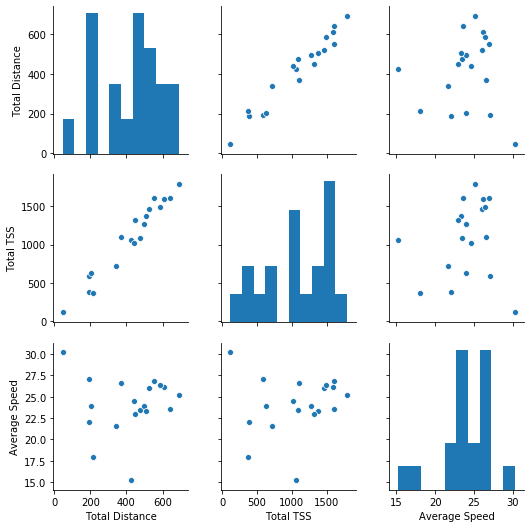

In [19]:
sns.pairplot(df_DT)

## Challenge
* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

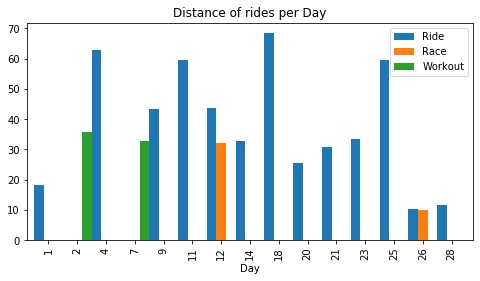

In [20]:
func(5,2019)